# Group 186 - Android Malware Detection

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: Group 186</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
    <th>Contribution</th>  
  </tr>
  <tr>
    <td>Sindhu C</td>
    <td>2021FC04993</td>
    <td>100%</td>      
  </tr>
  <tr>
    <td>Sivarajan N</td>
    <td>2021FC04989</td>
    <td>100%</td>      
  </tr>
  <tr>
    <td>Manibalan S</td>
    <td>2021fc04442</td>
    <td> 0% </td>      
 </tr>
</table>



**Business Understanding- Introduction**


With the popularity of Android devices, the number of applications made for the android operating system is
also increasing day by day. But the biggest challenge in this scenario is to identify if an application is an authentic
application or a malware. This project tries to identify an application as malware/not based on the permissions
required by the application

#### Data Acquisition - Data Set


The dataset given here is taken from Kaggle and consists of about 331 features which are the different android
permissions asked by the application (0 denotes not required and 1 denotes required). The no rows/malware
readings for each permission is 398. It is the ‘type’ label which represents a given row corresponding to whether
an application is malware or not.

#### Import packages

In [3]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import tree

### Load Data


Read dataset into pandas dataframe

In [4]:
df = pd.read_csv("Dataset_Android-1.csv", sep=";")
df.shape
df.columns = map(str.lower, df.columns)

#### Understanding - Exploratory Analysis

List the features

In [5]:
for column in df.columns.tolist():
    print(column)

android
android.app.cts.permission.test_granted
android.intent.category.master_clear.permission.c2d_message
android.os.cts.permission.test_granted
android.permission.access_all_downloads
android.permission.access_all_external_storage
android.permission.access_bluetooth_share
android.permission.access_cache_filesystem
android.permission.access_checkin_properties
android.permission.access_coarse_location
android.permission.access_content_providers_externally
android.permission.access_download_manager
android.permission.access_download_manager_advanced
android.permission.access_drm_certificates
android.permission.access_fine_location
android.permission.access_fm_radio
android.permission.access_input_flinger
android.permission.access_keyguard_secure_storage
android.permission.access_location_extra_commands
android.permission.access_mock_location
android.permission.access_mtp
android.permission.access_network_conditions
android.permission.access_network_state
android.permission.access_notif

### Wrangling - Data wrangling and Pre-processing

Get all non numeric values from the dataset

In [6]:
null_series = df.isnull().sum()
count =0
for _, val in null_series.iteritems():
    if(val>0):
        print (_ + "      "+ str(val))
    else:
        count = count +1
print("number of columns with no null values: "+ str(count))

na_series = df.isna().sum()
count =0
for _, val in na_series.iteritems():
    if(val>0):
        print (_ + "      "+ str(val))
    else:
        count = count +1
print("number of columns with no na values: "+ str(count))

number of columns with no null values: 331
number of columns with no na values: 331


So there are no missing values in the dataset

Find all outlier values in each column

In [7]:
onezero = 0
for column in df.columns:
    cnt = len(df[(df[column]!= 0) & (df[column]!= 1)])
    if(cnt > 0):
        print(column + " has "+ str(cnt) +" rows with value other than 0,1")
    else:
        onezero = onezero + 1
print("Total number of features with values as only 0,1: " + str(onezero))

Total number of features with values as only 0,1: 331


There are no outliers in any column

Since all values are either 0 or 1 no need to perform normalization

So let's cast the dataframe columns to integer type to ease out our analysis process

In [9]:
df = df.astype("int64")

View sample data

In [10]:
df.head()

,android,android.app.cts.permission.test_granted,android.intent.category.master_clear.permission.c2d_message,android.os.cts.permission.test_granted,android.permission.access_all_downloads,android.permission.access_all_external_storage,android.permission.access_bluetooth_share,android.permission.access_cache_filesystem,android.permission.access_checkin_properties,android.permission.access_coarse_location,...,com.android.voicemail.permission.write_voicemail,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.c2d_message,org.chromium.chrome.shell.permission.debug,org.chromium.chrome.shell.permission.sandbox,org.chromium.chromecast.shell.permission.sandbox,org.chromium.content_shell.permission.sandbox,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Analyze feautres 

Count of malware (1) vs benign apps (0) based on type column

In [11]:
df.type.value_counts()

1    199
0    199
Name: type, dtype: int64

So there are 199 malwares and 199 benign apps in the dataset.<br>
So the data is equally distributed

#### Plot 10 features

Let us find the top 10 features that determine whether the app is malware or not

Top 10 permissions required by Malware apps

In [12]:
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11]

android.permission.internet                  195
android.permission.read_phone_state          190
android.permission.access_network_state      167
android.permission.write_external_storage    136
android.permission.access_wifi_state         135
android.permission.read_sms                  124
android.permission.write_sms                 104
android.permission.receive_boot_completed    102
android.permission.access_coarse_location     80
android.permission.change_wifi_state          75
dtype: int64

Top 10 permissions required by benign apps

In [13]:
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[1:11]

android.permission.write_external_storage    76
android.permission.access_network_state      62
android.permission.wake_lock                 36
android.permission.receive_boot_completed    30
android.permission.access_wifi_state         29
android.permission.read_phone_state          24
android.permission.vibrate                   21
android.permission.access_fine_location      18
android.permission.read_external_storage     15
android.permission.read_contacts             13
dtype: int64

Let us plot a bar char for the above top 10 features

<AxesSubplot:title={'center':'Malware Apps'}, xlabel='Permissions', ylabel='Count of apps'>

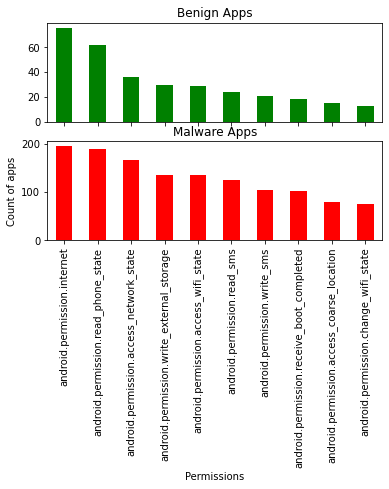

In [14]:
fig, axs =  plt.subplots(nrows=2, sharex=True)
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[0], color="green", title="Benign Apps")
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red", title="Malware Apps", ylabel="Count of apps", xlabel="Permissions")

Describing the features in the dataset

In [15]:
df_desc = df.describe()
df_desc

,android,android.app.cts.permission.test_granted,android.intent.category.master_clear.permission.c2d_message,android.os.cts.permission.test_granted,android.permission.access_all_downloads,android.permission.access_all_external_storage,android.permission.access_bluetooth_share,android.permission.access_cache_filesystem,android.permission.access_checkin_properties,android.permission.access_coarse_location,...,com.android.voicemail.permission.write_voicemail,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.c2d_message,org.chromium.chrome.shell.permission.debug,org.chromium.chrome.shell.permission.sandbox,org.chromium.chromecast.shell.permission.sandbox,org.chromium.content_shell.permission.sandbox,test_permission,type
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005025,0.0,0.233668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070799,0.0,0.423696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500629
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


from above we can see that certain keywords in permission seems more suspicious so selecting those columns

In [16]:
df1= df.copy()
df1 = df1.loc[:,df1.columns.str.contains('type')  |  df1.columns.str.contains('write') | df1.columns.str.contains('delete') | df1.columns.str.contains('clear') | df1.columns.str.contains('boot') | df1.columns.str.contains('change')| df1.columns.str.contains('credential')|df1.columns.str.contains('admin')|df1.columns.str.contains('list')|df1.columns.str.contains('secure_storage')|df1.columns.str.contains('notifications')|df1.columns.str.contains('account')|df1.columns.str.contains('destroy')|df1.columns.str.contains('mount')|df1.columns.str.contains('authenticate')|df1.columns.str.contains('privileged')|df1.columns.str.contains('brick')|df1.columns.str.contains('transmit')|df1.columns.str.contains('capture')|df1.columns.str.contains('disable')|df1.columns.str.contains('install')|df1.columns.str.contains('certificate')|df1.columns.str.contains('send')|df1.columns.str.contains('shutdown')|df1.columns.str.contains('start_any_activity')|df1.columns.str.contains('lock')|df1.columns.str.contains('sms')|df1.columns.str.contains('call')|df1.columns.str.contains('danger')|df1.columns.str.contains('voicemail')]

In [17]:
df1.head()

,android.intent.category.master_clear.permission.c2d_message,android.permission.access_drm_certificates,android.permission.access_keyguard_secure_storage,android.permission.access_notifications,android.permission.account_manager,android.permission.asec_destroy,android.permission.asec_mount_unmount,android.permission.authenticate_accounts,android.permission.bind_device_admin,android.permission.bind_incall_service,...,com.android.launcher.permission.uninstall_shortcut,com.android.launcher.permission.write_settings,com.android.launcher3.permission.write_settings,com.android.permission.whitelist_bluetooth_device,com.android.providers.tv.permission.write_epg_data,com.android.smspush.wappush_manager_bind,com.android.voicemail.permission.add_voicemail,com.android.voicemail.permission.read_voicemail,com.android.voicemail.permission.write_voicemail,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


remove columns that contain only 0

In [18]:
df1 = df1.loc[:, (df1 != 0).any(axis=0)]
df1.describe()

,android.permission.authenticate_accounts,android.permission.bluetooth_admin,android.permission.call_phone,android.permission.call_privileged,android.permission.change_component_enabled_state,android.permission.change_configuration,android.permission.change_network_state,android.permission.change_wifi_multicast_state,android.permission.change_wifi_state,android.permission.change_wimax_state,...,android.permission.write_external_storage,android.permission.write_secure_settings,android.permission.write_settings,android.permission.write_sms,android.permission.write_sync_settings,com.android.browser.permission.write_history_bookmarks,com.android.launcher.permission.install_shortcut,com.android.launcher.permission.uninstall_shortcut,com.android.launcher.permission.write_settings,type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.017588,0.017588,0.155779,0.002513,0.002513,0.015075,0.025126,0.005025,0.221106,0.005025,...,0.532663,0.012563,0.055276,0.263819,0.020101,0.045226,0.042714,0.007538,0.022613,0.500000
std,0.131614,0.131614,0.363102,0.050125,0.050125,0.122006,0.156704,0.070799,0.415514,0.070799,...,0.499560,0.111518,0.228807,0.441257,0.140521,0.208061,0.202465,0.086601,0.148854,0.500629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Plot grouped bar chart to better understand the feature relationship

<AxesSubplot:>

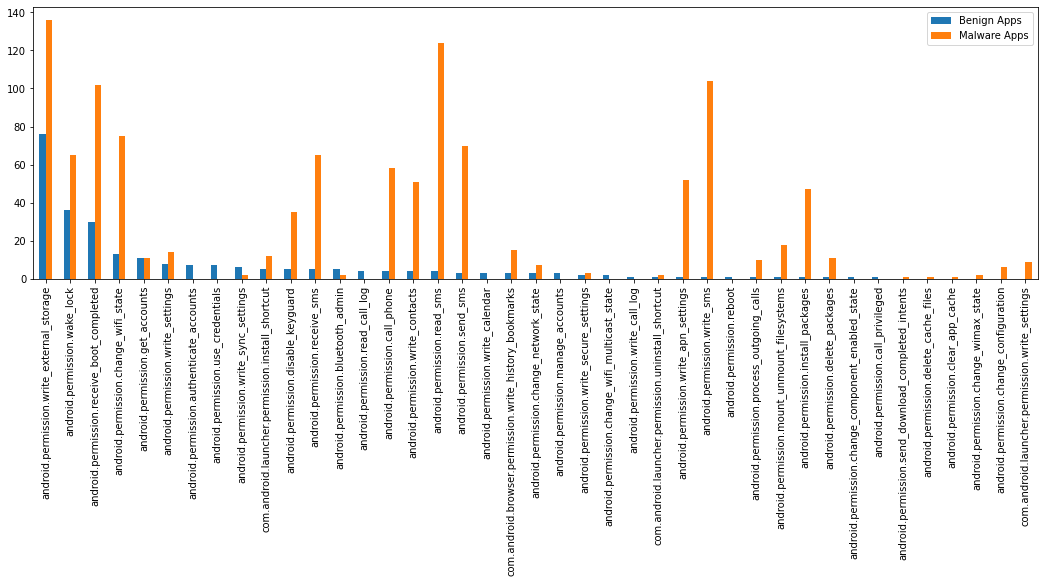

In [19]:
bdf1 = pd.Series.sort_values(df1[df1.type==0].sum(axis=0), ascending=False)
mdf1 = pd.Series.sort_values(df1[df1.type==1].sum(axis=0), ascending=False)
del bdf1['type']
del mdf1['type']
pd.concat({'Benign Apps': bdf1, 'Malware Apps': mdf1}, axis=1).plot.bar(figsize=(18,5))

## Feature Engineering

#### Feature selection

We check Top 10 features that determine malware

<AxesSubplot:title={'center':'Malware Apps'}, xlabel='Permissions', ylabel='Count of apps'>

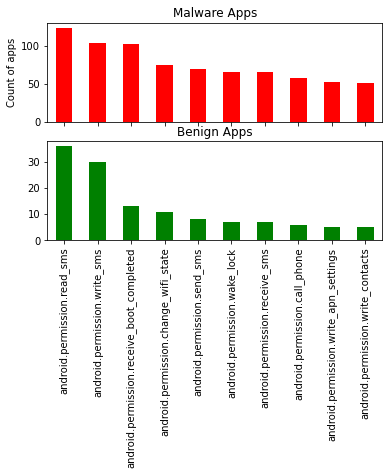

In [20]:
fig, axs =  plt.subplots(nrows=2, sharex=True)
bdf1[1:11].plot.bar(ax=axs[1], color="green", title="Benign Apps")
mdf1[1:11].plot.bar(ax=axs[0], color="red", title="Malware Apps", ylabel="Count of apps", xlabel="Permissions")

#### Observation
From the above bar chart it is evident that only Malware apps predominantly require permission that control sms, wifi, lock, call, apn and contacts

## Modeling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, 1:42], df1['type'], test_size=0.20, random_state=42)

In [22]:
X_train.shape, X_test.shape

((318, 41), (80, 41))

In [23]:
y_train.shape, y_test.shape

((318,), (80,))

Naive Bayes algorithm

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Naive Bayes")
print("Accuracy: " + str(accuracy))
print(classification_report(pred, y_test, labels=None))

Naive Bayes
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        46

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



k-neighbors algorithm

In [25]:
for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    accuracy = accuracy_score(pred, y_test)
    print("k-neighbors {}".format(i))
    print("Accuracy: " + str(accuracy))
    print(classification_report(pred, y_test, labels=None))
    print("")

k-neighbors 3
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        46

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


k-neighbors 6
Accuracy: 0.925
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.87      1.00      0.93        40

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.93      0.93      0.92        80


k-neighbors 9
Accuracy: 0.9125
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        41
           1       0.85      1.00      0.92        39

    accuracy                           0.91        80
   macro avg       0.92      0.91    

Decision Tree

In [26]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predict the Test set results with criterion gini index

In [27]:
y_pred_gini = clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [28]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy to check for overfitting

In [29]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


Check for overfitting and underfitting

In [31]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


Here, the training-set accuracy score is 1.0000 while the test-set accuracy to be 1.0000. These two values are quite comparable. So, there is no sign of overfitting.

Visualize decision-trees

[Text(334.8, 326.15999999999997, 'X[40] <= 0.5\ngini = 0.499\nsamples = 318\nvalue = [165, 153]'),
 Text(167.4, 108.72000000000003, 'gini = 0.0\nsamples = 165\nvalue = [165, 0]'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.0\nsamples = 153\nvalue = [0, 153]')]

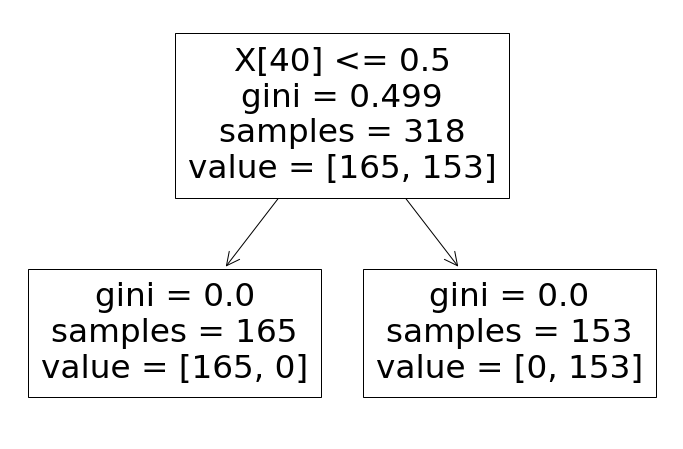

In [32]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

Decision Tree Classifier with criterion entropy

In [33]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the Test set results with criterion entropy

In [34]:
y_pred_en = clf_en.predict(X_test)

Check accuracy score with criterion entropy

In [35]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 1.0000


Compare the train-set and test-set accuracy

In [36]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


Check for overfitting and underfitting

In [38]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 1.0000 while the test-set accuracy to be 1.0000. These two values are quite comparable. So, there is no sign of overfitting

Visualize decision-tree

[Text(334.8, 326.15999999999997, 'X[40] <= 0.5\nentropy = 0.999\nsamples = 318\nvalue = [165, 153]'),
 Text(167.4, 108.72000000000003, 'entropy = 0.0\nsamples = 165\nvalue = [165, 0]'),
 Text(502.20000000000005, 108.72000000000003, 'entropy = 0.0\nsamples = 153\nvalue = [0, 153]')]

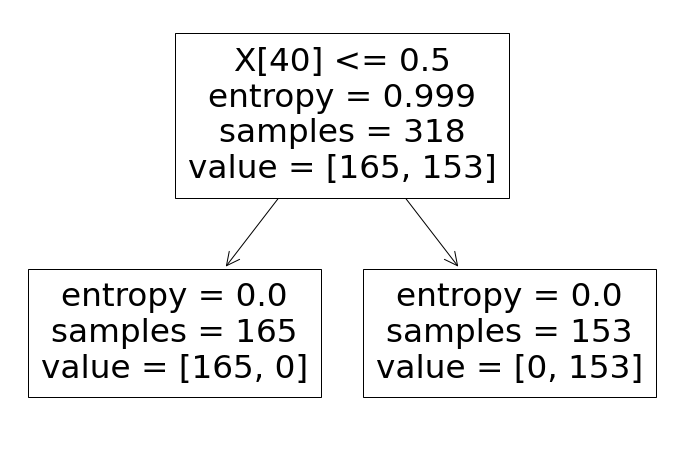

In [39]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X_train, y_train)) 

Now, based on the above analysis we can conclude that our classification model accuracy is excellent. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

We have another tool called Confusion matrix that comes to our rescue.

Confusion matrix

In [42]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[34  0]
 [ 0 46]]


Classification Report

In [43]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        46

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Random Forest

In [44]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print("Random Forest Classifier")
print("Accuracy Score: "+ str(accuracy))
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score: ", cohen_kappa_score(y_test, pred))
print("")
print('Confusion matrix\n\n',cm)

Random Forest Classifier
Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        46

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

cohen kappa score:  1.0

Confusion matrix

 [[34  0]
 [ 0 46]]


### Recommendation / Suggestion
1.	We tried Naive Bayes which resulted in accuracy score of 1.0
2.	Then we tried K-neighbout which resulted in accuracy score as follows,
    *     kneighbors:  3 Accuracy: 1.0
    *     kneighbors:  6 Accuracy: 0.9125
    *     kneighbors:  9 Accuracy: 0.9125
    *     kneighbors: 12 Accuracy: 0.9
3.	So we have built a Decision-Tree Classifier model for Android Malware Detection. We built two models, one with criterion gini index and another one with criterion entropy. These models yields a very good performance as indicated by the model accuracy in both the cases to be 1.0000
4.	In the model with criterion gini index, the training-set accuracy score and the test-set accuracy to be 1.0000. These two values are same. So, there is no sign of overfitting.
5.	Similarly, in the model with criterion entropy, the training-set accuracy score and the test-set accuracy to be 1.0000. These two values are same. So, there is no sign of overfitting.
6.	Then we tried Random forest classifier which resulted in accuracy score of  1.0 and cohen kappa score of 1.0
7.	The confusion matrix and classification report yields excellent model performance.

<br>
Conclusion of Group 186 - Android Malware Deduction